## Descriptive Statistical Analysis of Fuel Economy of Cars

### 1. Data Wrangling and Cleaning
Let us first find characteristic features of the datasets we have 
at our disposal, namely the 2008 and the 2018 datasets for fuel 
economy.

In [362]:
# first make all the necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set()

In [363]:
# read 2008 data
df08 = pd.read_csv('all_alpha_08.csv')
df08.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no


In [364]:
# read 2018 data
df18 = pd.read_csv('all_alpha_18.csv')
df18.head(2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


In [365]:
print(f'There are {df08.shape[0]} rows/samples and {df08.shape[1]} '
      f'columns/features in the 2008 dataset ')
print(f'There are {df18.shape[0]} rows/samples and {df18.shape[1]} '
      f'columns/features in the 2018 dataset ')

There are 2404 rows/samples and 18 columns/features in the 2008 dataset 
There are 1611 rows/samples and 18 columns/features in the 2018 dataset 


Lets analyse the 2008 dataset

In [366]:
# duplicate rows in the 2008 dataset - 25
sum(df08.duplicated())

25

In [367]:
# datatypes of 2008 columns
df08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [368]:
# rows with missing values in the 2008 data = 199
df08[df08.isna().any(axis=1)].shape[0]

199

Now lets analyse the  2018 dataset

In [369]:
# duplicate rows in the 2018 dataset - no duplicate rows
sum(df18.duplicated())

0

In [370]:
# datatypes of 2018 columns
df18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [371]:
# rows with missing values in the 2008 data = 199
df18[df18.isna().any(axis=1)].shape[0]

2

In the following sections, we will do some data cleaning and 
wrangling, specifically to get rid of redundant features and to 
handle duplicate and null rows.

In [372]:
# remove extraneous feature columns from 08 data that are not 
# present in both datatsets
df08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],
          axis=1,
          inplace=True)

df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],
          axis=1,
          inplace=True)

In [373]:
# rename columns and brng consistency in names
df08.rename({'Sales Area': 'Cert Region'}, axis=1, inplace=True)

# replace space in column names with underscores and conv to lowercase
df08.rename(lambda name: name.replace(" ", "_").lower(), 
            axis=1, 
            inplace=True)
df18.rename(lambda name: name.replace(" ", "_").lower(), 
            axis=1, 
            inplace=True)

In [374]:
# For consistency, only compare cars certified by California standards.
df08 = df08[df08['cert_region'] == 'CA']
df08.drop(['cert_region'], axis=1, inplace=True)

df18 = df18[df18['cert_region'] == 'CA']
df18.drop(['cert_region'], axis=1, inplace=True)

In [375]:
# drop nulls and NA rows
df08.dropna(inplace=True)
df18.dropna(inplace=True)


In [376]:
# drop dulicates from both dfs
df08.drop_duplicates(inplace=True)
df18.drop_duplicates(inplace=True)

In [377]:
# sanity check
print(f'no. of samples in 08 df: {df08.shape[0]}')
print(f'no. of samples in 18 df: {df18.shape[0]}')
print(f"no. of columns in the df's: {df18.shape[1]}")

no. of samples in 08 df: 986
no. of samples in 18 df: 794
no. of columns in the df's: 13


In [378]:
# convert cyl column in 08 and 18 to float
import re
df08['cyl'] = df08['cyl']\
    .apply(lambda str_: int(re.findall('\d+', str_)[0]))
df18['cyl'] = df18['cyl'].apply(lambda str_:int(str_))

We need to convert the air pollution scores to floats in both 
dataframes. In the 08 dataframe, it is encoded as string and that 
in the 18 dataframe is encoded as int64. In the 08 dataset, the 
score in some samples appears as a figure separated by the '/'. 
This is when the car is a hybrid and the score is quoted for both 
types of fuel it uses. We will have to find those samples and split
 them as 2 rows, each with a unique fuel type and air pollution 
 score. Note that, this is also the case for other features like 
 mileage so we would also have to extend the tratement to those 
 columns.
 
 

In [379]:
# working on the 08 dataframe
hybrid08 = df08[df08['fuel'].str.contains('/')]

# Lets take a look at the hybrid cars
hybrid08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


There is only one such sample in the 08 dataframe that is a hybrid car. We will split this sample into 2 rows, one corresponding to each fuel type.

In [380]:
# first make 2 copies of the hybrid dataframe
hybrid08_1 = hybrid08.copy()
hybrid08_2 = hybrid08.copy()

# decide the column features to make a split on
split_cols = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# now split the data into 2 separate dataframes according to the fuel type
for col in split_cols:
    hybrid08_1[col] = hybrid08_1[col].apply(lambda str_: str_.split('/')[0])
    hybrid08_2[col] = hybrid08_2[col].apply(lambda str_: str_.split('/')[1])
# visualise the 2 dataframe rows into one
split_rows = hybrid08_1.append(hybrid08_2)
split_rows

# finally append the rows to the actual dataframe, however the mother rows need to be removed from the mother dataframe
df08.drop(index=hybrid08.index, axis=0, inplace=True)

# finally append the split rows
df08 = df08.append(split_rows, ignore_index=True)

# finally get the shape
df08.shape

(987, 13)

Now we repeat the same process with the 18 dataset. This dataset contains more number of such sample rows.

In [381]:
# working on the 18 dataframe
hybrid18 = df18[df18['fuel'].str.contains('/')]
hybrid18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


It is to be noted that the air pollution score and the green house gas score columns for the 18 dataframes do not contain "/" format so in this case the split columns will not include the aforementioned feature columns.

In [382]:
# first make 2 copies of the hybrid dataframe
hybrid18_1 = hybrid18.copy()
hybrid18_2 = hybrid18.copy()

# decide the column features to make a split on
split_cols = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# now split the data into 2 separate dataframes according to the fuel type
for col in split_cols:
    hybrid18_1[col] = hybrid18_1[col].apply(lambda str_: str_.split('/')[0])
    hybrid18_2[col] = hybrid18_2[col].apply(lambda str_: str_.split('/')[1])
# visualise the 2 dataframe rows into one
split_rows = hybrid18_1.append(hybrid18_2)
split_rows

# finally append the rows to the actual dataframe, however the mother rows need to be removed from the mother dataframe
df18.drop(index=hybrid18.index, axis=0, inplace=True)

# finally append the split rows
df18 = df18.append(split_rows, ignore_index=True)

# finally get the shape
df18.shape

(832, 13)

In [383]:
# convert smog score of 08 and 18 data to float
df08['air_pollution_score'] = df08['air_pollution_score'].astype(float)
df18['air_pollution_score'] = df18['air_pollution_score'].astype(float)

In [384]:
# convert strings city_mpg, hwy_mpg and cmb_mpg to floats in both dataframes
cols = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
dfs = [df08, df18]

for df in dfs:
    for col in cols:
        df[col] = df[col].astype(float)

In [385]:
# only convert the 08 greenhouse score to int
df08['greenhouse_gas_score'] = df08['greenhouse_gas_score'].astype(int)

In [386]:
# convert the dfs to csv
df08.to_csv('df08clean.csv', index=False)

In [387]:
# convert the dfs to csv
df18.to_csv('df18clean.csv', index=False)

### 2. Data Visualisation and Conclusions

#### (i) Compare the distributions of greenhouse gas score in 2008 and 2018

Text(0.5, 1.0, '2018 greenhouse gas distribution')

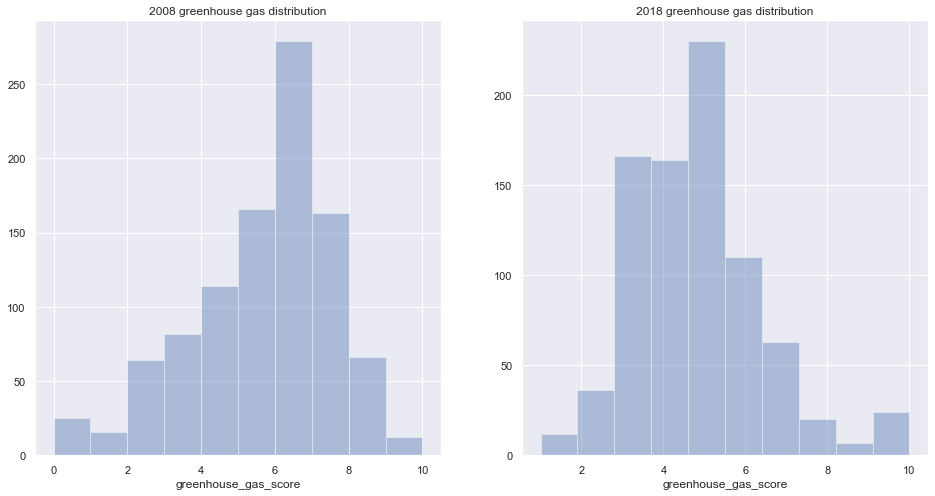

In [388]:
# Compare the distributions of greenhouse gas score in 2008 and 2018
f, a = plt.subplots(1,2, figsize=(16,8)) # type: axes.Axes
sns.distplot(df08['greenhouse_gas_score'], ax=a[0], kde=False, bins=10);
sns.distplot(df18['greenhouse_gas_score'], ax=a[1], kde=False, bins=10);
a[0].set_title('2008 greenhouse gas distribution')
a[1].set_title('2018 greenhouse gas distribution')

For 2008, the green house gas score distribution seems to be left skewed while that for 2018 shows that its somewhat normally distributed. 

#### (ii) Compare the distributions of combined mpg in 2008 and 2018

Text(0.5, 1.0, '2018 combined mpg distribution')

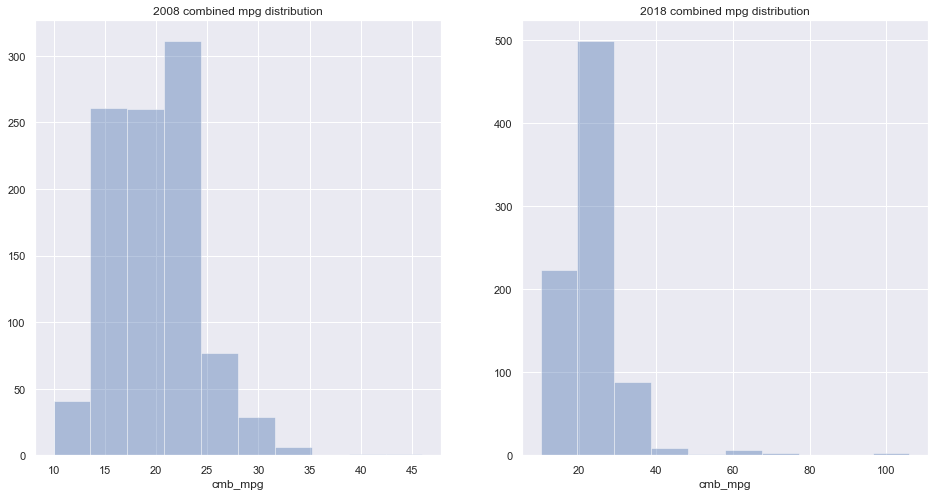

In [389]:
# Compare the distributions of combined mpg in 2008 and 2018
f, a = plt.subplots(1,2, figsize=(16,8)) # type: axes.Axes
sns.distplot(df08['cmb_mpg'], ax=a[0], kde=False, bins=10);
sns.distplot(df18['cmb_mpg'], ax=a[1], kde=False, bins=10);
a[0].set_title('2008 combined mpg distribution')
a[1].set_title('2018 combined mpg distribution')

In 2018, the distribution for combined mpg has become much more skewed to the right.

#### (iii) Compare the correlation of combined mpg and displacement in 2008 and 2018

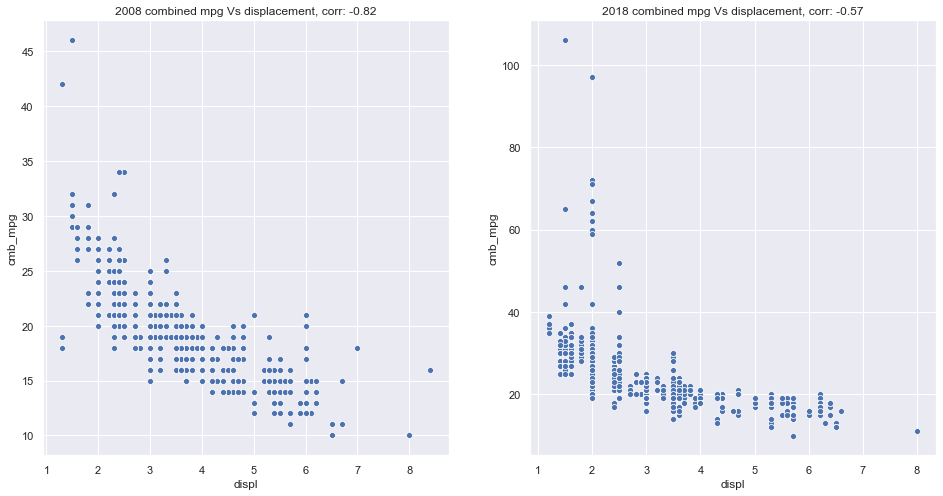

In [390]:
# Compare the correlation of combined mpg and displacement in 2008 and 2018
f, a = plt.subplots(1,2, figsize=(16,8)) # type: axes.Axes
corr08 = df08['displ'].corr(df08['cmb_mpg'])
corr18 = df18['displ'].corr(df18['cmb_mpg'])
sns.scatterplot(x=df08['displ'], y=df08['cmb_mpg'], ax=a[0]);
sns.scatterplot(y=df18['cmb_mpg'], x=df18['displ'], ax=a[1]);
a[0].set_title(f'2008 combined mpg Vs displacement, corr: {corr08:0.2f}');
a[1].set_title(f'2018 combined mpg Vs displacement, corr: {corr18:0.2f}');

As the engine displacement increases, the combined miles per gallon of the car decreases. There is a negative correlation. The calculated values of the correlation coefficients are shown in the titles.

#### (iv) Compare the correlation of combined mpg and greenhouse gas score in 2008 and 2018

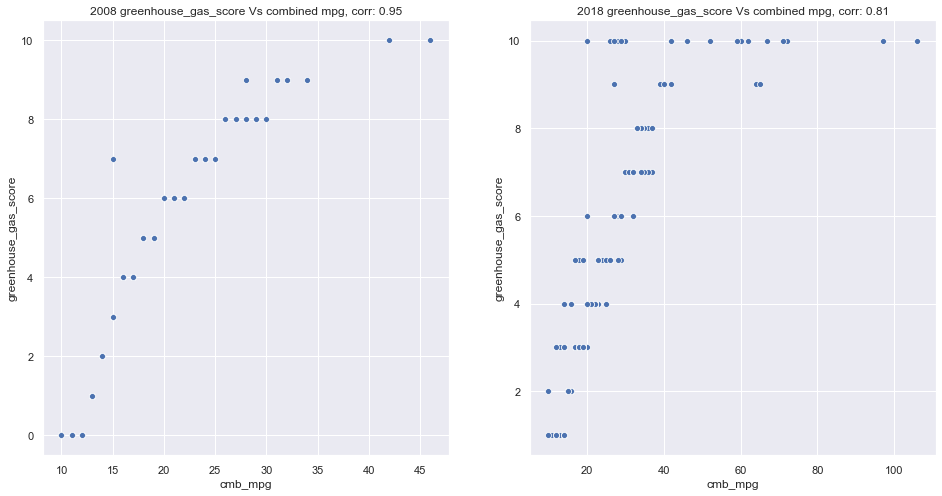

In [391]:
# Compare the correlation of combined mpg and greenhouse gas score in 2008 and 2018
f, a = plt.subplots(1,2, figsize=(16,8)) # type: axes.Axes
corr08 = df08['greenhouse_gas_score'].corr(df08['cmb_mpg'])
corr18 = df18['greenhouse_gas_score'].corr(df18['cmb_mpg'])

sns.scatterplot(y=df08['greenhouse_gas_score'], x=df08['cmb_mpg'], ax=a[0]);
sns.scatterplot(y=df18['greenhouse_gas_score'], x=df18['cmb_mpg'], ax=a[1]);
a[0].set_title(f'2008 greenhouse_gas_score Vs combined mpg, corr: {corr08:0.2f}');
a[1].set_title(f'2018 greenhouse_gas_score Vs combined mpg, corr: {corr18:0.2f}');

As the combined mpg increases, the greenhouse gas score of the car also increases. There is a positive correlation. The calculated values of the correlation coefficients are shown in the titles.

#### (v) Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [392]:
# find out the alternative fuels in 2008
df08['fuel'].value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

The alternative fuels in 2008 are ethanol and CNG.

In [393]:
# find out the alternative fuels in 2018
df18['fuel'].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

The alternative fuels in 2018 are Ethanol, Electricity.

In [394]:
# unique models using alternative fuel in 2008
unique_model_08 = df08[df08['fuel'].apply(lambda fuel: fuel in ['ethanol', 'CNG'])]
unique_model_08['model'].nunique()

2

In [395]:
# unique models using alternative fuel in 2018
unique_model_18 = df18[df18['fuel'].apply(lambda fuel: fuel in ['Ethanol', 'Electricity'])]
unique_model_18['model'].nunique()

26

#### (vi) How much have vehicle classes improved in fuel economy (increased in mpg)? 

In [396]:
# groupby vehicle classes and then find mean cmb_mpgs for 2008 and 2018
veh_class_08 = df08.groupby('veh_class').mean()
veh_class_18 = df18.groupby('veh_class').mean()

# amount of increase
increase = veh_class_18['cmb_mpg'] - veh_class_08['cmb_mpg']
increase.dropna(inplace=True)
increase

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

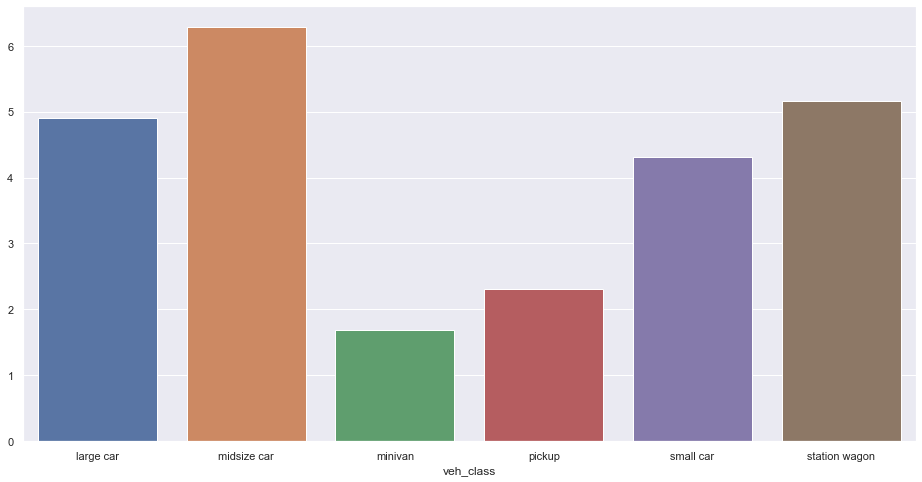

In [397]:
f, a = plt.subplots(1,1, figsize=(16,8))
sns.barplot(x=increase.index, y=increase.values, ax=a)

It looks like mid sized cars have had the highest mean increase in combined mpg in 2018 as compared to 2008.

#### (vii) What features are associated with better fuel economy (mpg)? 

In [398]:
df08.corr()['cmb_mpg']

displ                  -0.818799
cyl                    -0.770538
air_pollution_score     0.425784
city_mpg                0.980891
hwy_mpg                 0.960533
cmb_mpg                 1.000000
greenhouse_gas_score    0.947607
Name: cmb_mpg, dtype: float64

In [399]:
df18.corr()['cmb_mpg']

displ                  -0.574880
cyl                    -0.561166
air_pollution_score     0.301150
city_mpg                0.992635
hwy_mpg                 0.978206
cmb_mpg                 1.000000
greenhouse_gas_score    0.814982
Name: cmb_mpg, dtype: float64

From the above correlation coefficient values of combined mpg (fuel economy) with other features of a car, it can be observed that higher fuel economy (combined mpg) is associated with lower engine displacements, lower cylinder numbers in engine, and higher greenhouse gas score.

#### (viii) For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [400]:
# Rename 2008 columns to distinguish from 2018 columns after the merge
model08 = df08.rename(lambda x: x[:10] + "_2008", axis=1)
model08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [401]:
merge_result = df18.merge(model08, left_on='model', right_on='model_2008', how='inner')
merge_result.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,...,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,...,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,...,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,...,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes
3,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,...,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,25.0,7,yes
4,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,...,Auto-S6,4WD,Gasoline,station wagon,6.0,18.0,25.0,21.0,6,no


In [402]:
# drop redundant model 2008 column
merge_result.drop('model_2008', inplace=True, axis=1)

In [403]:
# now groupby model and then find mean
mean_cmb_mpg = merge_result.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]
mean_cmb_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [404]:
# add increase column
mean_cmb_mpg['increase'] = mean_cmb_mpg['cmb_mpg'] - mean_cmb_mpg['cmb_mpg_2008']
mean_cmb_mpg.head()

,cmb_mpg_2008,cmb_mpg,increase
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [405]:
# now find the car(s) with the max increase in fuel economy
mean_cmb_mpg[mean_cmb_mpg['increase'] == mean_cmb_mpg['increase'].max()]

,cmb_mpg_2008,cmb_mpg,increase
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
